<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Project_BLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [ ]:
!kaggle datasets download -d jaforero/baloto-colombia

  0% 0.00/10.5k [00:00<?, ?B/s]
100% 10.5k/10.5k [00:00<00:00, 7.00MB/s]


In [ ]:
!unzip '/content/baloto-colombia.zip' && rm '/content/baloto-colombia.zip' 

Archive:  /content/baloto-colombia.zip
  inflating: baloto.csv              
  inflating: revancha.csv            


In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [91]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/baloto.csv')
data.head(5)

,Date,C1,C2,C3,C4,C5,SB
0,4/22/2017,15,28,36,37,41,10
1,4/26/2017,1,2,25,31,33,14
2,4/29/2017,6,19,25,28,36,1
3,5/3/2017,5,6,7,12,37,6
4,5/6/2017,1,20,36,39,43,10


In [92]:
data["sum"] = data.iloc[:, 1:6].sum(axis=1)
data["range"] = data.iloc[:, 1:6].max(axis=1) - data.iloc[:, 1:6].min(axis=1)
data["max"] = data.iloc[:, 1:6].max(axis=1)
data["min"] = data.iloc[:, 1:6].min(axis=1)

data.tail()

,Date,C1,C2,C3,C4,C5,SB,sum,range,max,min
598,2/22/2023,13,14,6,8,22,12,63,16,22,6
599,2/25/2023,32,35,14,20,12,9,113,23,35,12
600,3/1/2023,16,36,39,42,23,11,156,26,42,16
601,3/4/2023,5,33,4,12,24,12,78,29,33,4
602,3/8/2023,26,41,35,24,36,7,162,17,41,24


In [93]:
a = np.round(sum(data['sum']/data.shape[0]),2)
a

109.87

<ipython-input-94-9aafe2349c13>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), linecolor="white", linewidths=2, annot=True, cmap="inferno")


<Axes: >

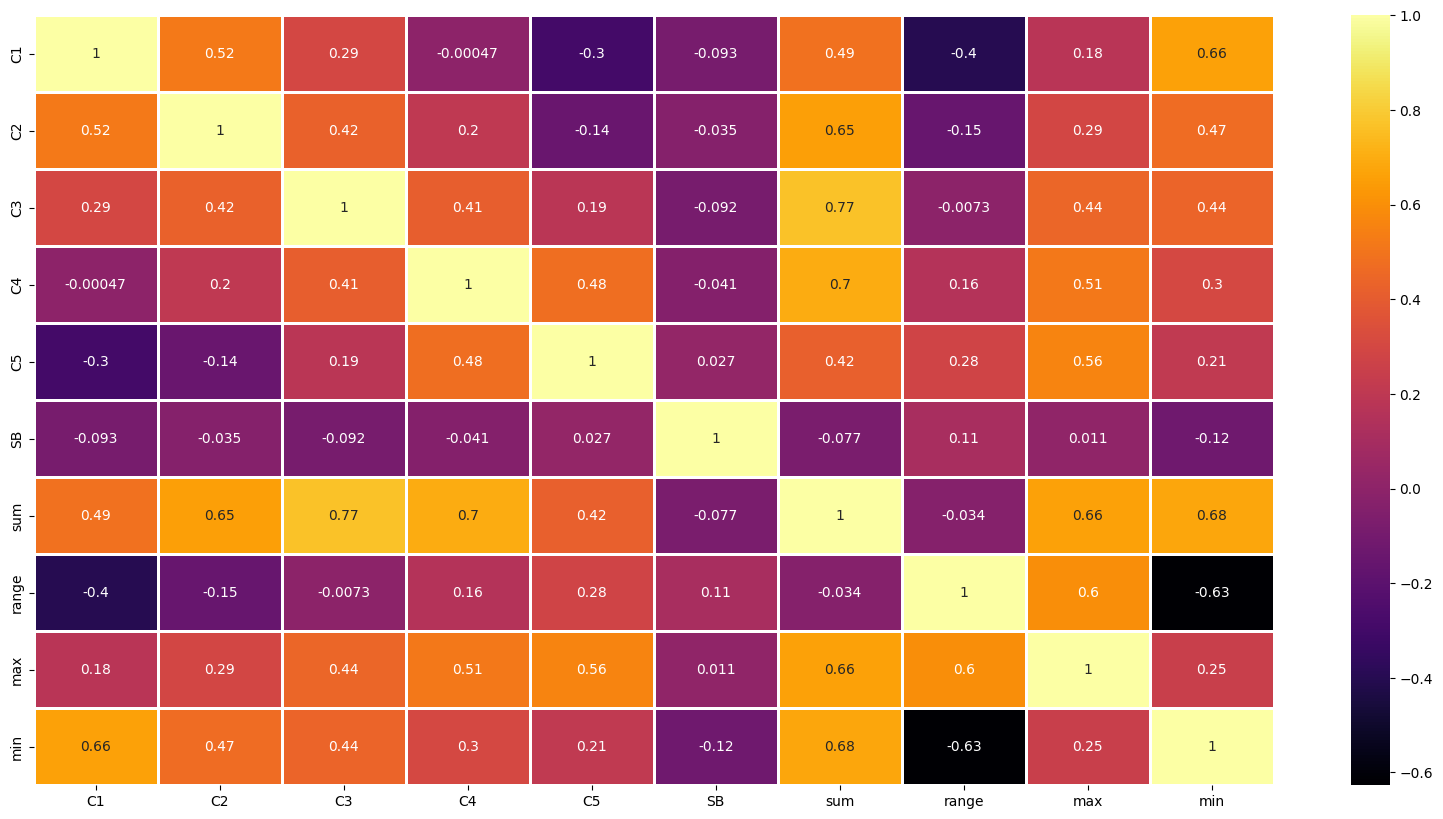

In [94]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), linecolor="white", linewidths=2, annot=True, cmap="inferno")

In [95]:
x = data[["sum", "range", "max", "min"]]
y = data.iloc[:, 1:6]

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    random_state=42,
                                                    test_size = 0.2)

In [96]:
print(x.shape,'\n', y.shape)

(603, 4) 
 (603, 5)


In [97]:
#With Linear Regression
lastResult = [24,35,20,29,11,2]
features = np.array([[110,17,43,1]])

reg_lr = LinearRegression()
reg_lr.fit(x_train,y_train)
lr = reg_lr.predict(features)
np.round(lr,2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[11.03, 16.79, 22.44, 27.09, 32.65]])

In [98]:
#With Random Forest Regressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
rf = reg_rf.predict(features)
rf

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[12.63, 15.76, 22.4 , 24.3 , 32.98]])

In [ ]:
#With SVR
reg_svr = SVR()
reg_svr.fit(x_train,y_train)
SvR = reg_svr.predict(features)
SvR

In [100]:
#With KNeigbors
reg_knn = KNeighborsRegressor()
reg_knn.fit(x_train,y_train)
knn = reg_knn.predict(features)
knn

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[22.6, 31.6, 34. , 33.2, 39.4]])

In [101]:
print("Numbers with: ","\n","\n",
      "Last Result🤑:            ",lastResult,"\n",
      "Linear Regression📊:      ", np.round(lr,2),"\n",
      "Random Forest Regressor🌳:", rf,"\n",
      "KNeighbors Regressor🏘️:   ", knn)

Numbers with:  
 
 Last Result🤑:             [24, 35, 20, 29, 11, 2] 
 Linear Regression📊:       [[11.03 16.79 22.44 27.09 32.65]] 
 Random Forest Regressor🌳: [[12.63 15.76 22.4  24.3  32.98]] 
 KNeighbors Regressor🏘️:    [[22.6 31.6 34.  33.2 39.4]]
